In [1]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

# To make dendrograms!-------
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
#-----------------------------


%matplotlib inline

# Project 2

## GENERAL INSTRUCTIONS:

**this is NOT a group project**
- **CLEARLY** mark where you are answering each question (all written questions must be answered in Markdown cells, NOT as comments in code cells)
- Show all code necessary for the analysis, but remove superfluous code

---

# DONUTS

Using the dataset [*krispykreme.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv),

In [2]:
# Load the Data Set
DF = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")
DF.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


In [3]:
# Print Column values for plotting
DF.columns

Index(['Restaurant_Item_Name', 'restaurant', 'Restaurant_ID', 'Item_Name',
       'Item_Description', 'Food_Category', 'Serving_Size',
       'Serving_Size_text', 'Serving_Size_Unit', 'Serving_Size_household',
       'Calories', 'Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholesterol',
       'Sodium', 'Potassium', 'Carbohydrates', 'Protein', 'Sugar',
       'Dietary_Fiber', 'Calories_100g', 'Total_Fat_100g',
       'Saturated_Fat_100g', 'Trans_Fat_100g', 'Cholesterol_100g',
       'Sodium_100g', 'Potassium_100g', 'Carbohydrates_100g', 'Protein_100g',
       'Sugar_100g', 'Dietary_Fiber_100g'],
      dtype='object')

**A)** make 3 scatterplots using ggplot to show:
    - `Sodium_100g` vs `Total_Fat_100g`
    - `Sodium_100g` vs. `Sugar_100g`
    - `Sugar_100g` vs `Total_Fat_100g`

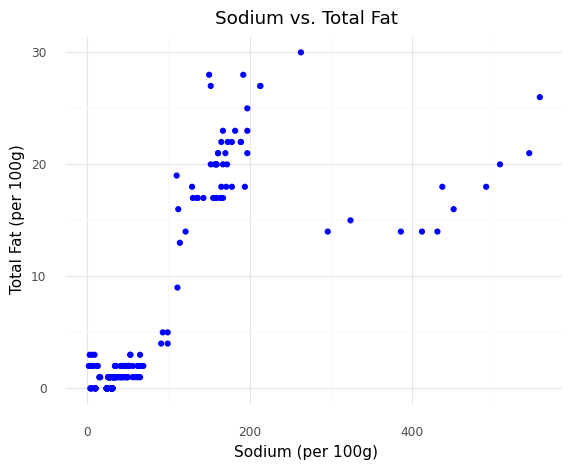

<ggplot: (155427300386)>

In [4]:
# Create a Sodium vs. Total Fat 
(ggplot(DF, aes(x = "Sodium_100g", y = 'Total_Fat_100g')) + geom_point(color = "blue") + theme_minimal()
 + ggtitle("Sodium vs. Total Fat")
 + labs(x = "Sodium (per 100g)", y = "Total Fat (per 100g)")
 
)

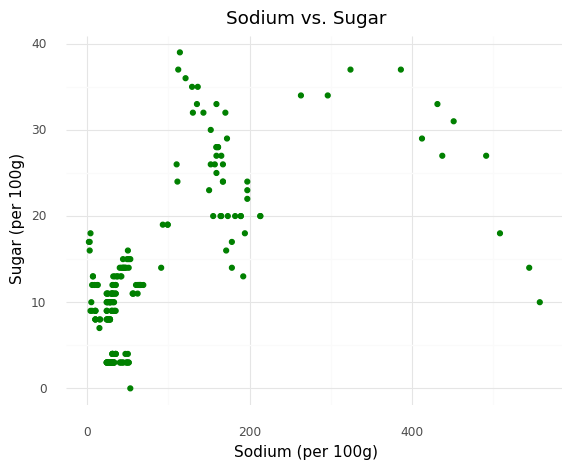

<ggplot: (155486558525)>

In [5]:
# Create a Sodium vs. Sugar
(ggplot(DF, aes(x = "Sodium_100g", y = 'Sugar_100g')) + geom_point(color = "green") + theme_minimal()
 + ggtitle("Sodium vs. Sugar")
 + labs(x = "Sodium (per 100g)", y = "Sugar (per 100g)")
)

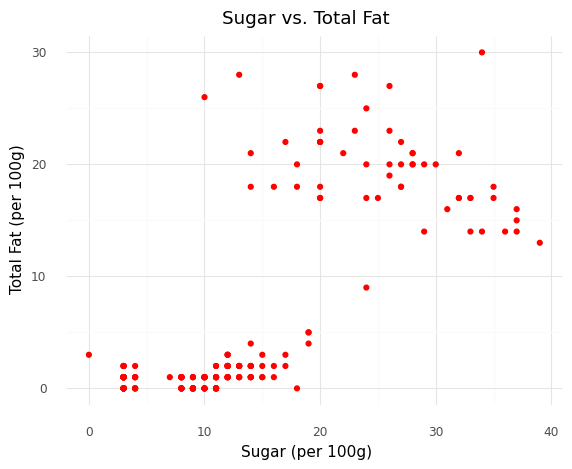

<ggplot: (155427347249)>

In [6]:
# Create a Sodium vs. Sugar
(ggplot(DF, aes(x = 'Sugar_100g', y = 'Total_Fat_100g')) + geom_point(color = "red") + theme_minimal()
 + ggtitle("Sugar vs. Total Fat")
 + labs(x = "Sugar (per 100g)", y = "Total Fat (per 100g)")
)

**B)** Using the scatterplots from part **a** as well as the donuts dataset, **thouroughly discuss which clustering method** (KMeans, Gaussian Mixture Models (EM), Hierarchical Clustering, or DBSCAN) **you think would be best for this data and WHY**. Be sure to include discussions of assumptions each algorithm does/does not make, and what types of data they are good/bad for (**mention each of the 4 algorithms at least once**). (*IN A MARKDOWN CELL*)

- Please note that for this assignment, "It's easier to code" or "it's comuptationally efficient" does not count as a valid reason. The reasons should be based on the algorithms/data.

- (Please use "\*\*" to make any mention of one of the algorithms bold in your discussion. For example "I think \*\*DBSCAN\*\* is the best algorithm ever!" will make the word "DBSCAN" bold in a Markdown cell).

### Comments on which Algorithm to use 

KMeans, Gaussian Mixture Models (EM), DBSCAN, or Hierarchical Clustering.

**Reasons Not to choose KMeans**

I do not believe **KMeans** would be the best Clustering Method for this data set. While I do not think it would be the worst clustering method to use, I also believe that there is a stronger method that will produce better results. One reason for my decision is that from the graphs above the clusters that naturally appear do not look spherical in nature so I think it would not be beneficial to assume all variances of the clusters are the same. The most influential reason I would not choose **KMeans** is because the plots above appear to have close clusters with some overlap. This is not good for the **KMeans** clustering method because **KMeans** has hard assignments meaning that a point can belong to only one cluster therefore when clusters overlap, we may see points that do not truly belong in the cluster they are in. For this reason, I would choose a clustering method that could handle clusters with low separation and some overlap.

**Reasons Not to choose DBSCAN**

From the above scatter plots I see that there does not appear to be much noise in all three of the plots. Each plot appears to have a somewhat distinct clustering of points with little points found scattered miscellaneous around the plot. For this reason, I do not believe **DBSCAN** is the best clustering method to use. Another reason **DBSCAN** is not the best, outside of the lack of noise which is one of its strongest reasons for choosing **DBSCAN**, is because the clusters in some of the plots appear to have different densities. The diversity of the clusters densities is one place where **DBSCAN** struggles when compared to other Clustering Models. In particular, the *Sodium vs. Sugar* and the *Sugar vs. Total Fat* plots appear to have clusters that are less dense than other clusters in the same plot. The final reason I do not believe **DBSCAN** is the best clustering Methods for this data set is that in each plot above there appears to be close clusters with some minor overlap between two or more clusters. This is another area where **DBSCAN** is sub-optimal compared to other clustering Methods.

#### Personally I am at a tie between Expectation Maximization and Hierarchical Agglomerative clustering methods

**Reasons to choose Expectaion Maximization**

From the scatter plots above it appears that there are naturally occurring clusters. These clusters appear very close to one another with some possible overlap in several areas. Overlapping clusters is where **Expectation Maximization** shines because it assumes probabilistic assignment or "soft" assignment, as opposed to KMean's hard assignment, meaning that each point has a probability of being in one cluster or another, which allows for this overlap in clusters. Additionally, not all the clusters appear spherical in nature so a clustering algorithm that allows for misshapen or non-spherical clusters would most likely be best for this particular data set. For clusters with non-spherical shapes, I would choose either **DBSCAN**, or in this particular case, **Expectation Maximization** because they are more flexible when it comes to the shape of the clusters, given both of their assumptions. While **Expectation Maximization** is more restrictive to the shape of the clusters compared to **DBSCAN**, **Expectation Maximization** is better than **DBSCAN** with clusters that overlap and touch such as the ones seen in the scatter plots above. 

- For these reasons I believe **Expectation Maximization** will be optimal for the *Krispy Kreme* data set.


**Reasons to choose Hierarchical Agglomerative Clustering**

From the data set provided it appears that the data might be hierarchical in nature which leads me to assume that **Hierarchical Agglomerative clustering** will be a good clustering algorithm for this particular data set. Using **Hierarchical Agglomerative clustering** will give me more flexibility over the choice of the number of clusters, as opposed to **KMeans** or **Expectation Maximization**. Furthermore, using **Hierarchical Agglomerative clustering** will provide me with more information about the relationship between the clusters, which is a perk no other clustering algorithm can provide. Finally, **Hierarchical Agglomerative clustering** gives me more flexibility over my linkage criteria, which I can use to attempt to make my model more accurate by combining different distance criteria with linkage criteria to find the optimal combination.

- For these reasons I believe **Hierarchical Agglomerative clustering** will also be optimal for the *Krispy Kreme* data set.

**C)** **Implement the algorithm** you think will work best here using the 3 variables `Sodium_100g`, `Total_Fat_100g` and `Sugar_100g`, and describe **how you chose any hyperparameters** (such as distance, # of clusters, min_samples, eps, linkage...etc). Make sure to z-score your variables. (*IN A MARKDOWN CELL*)


In [7]:
# Create a features list 
features = ['Sodium_100g', 'Total_Fat_100g', 'Sugar_100g']
X = DF[features]

In [8]:
# Z score continulous variables 
z = StandardScaler()
z.fit(X)
X[features] = z.transform(X)

## Expectation Maximization (Guassian Mixture) Model 

In [9]:
def EM_model(x, n):
    # Create an Empty Model with K = n clusters
    EM = GaussianMixture(n_components = n)
    # Fit the Model with X = x
    EM.fit(x)
    # Create cluster variable for Sihlouette Score
    cluster = EM.predict(x)
    return silhouette_score(x, cluster)

In [31]:
# Test K = 2
EM_model(X,2)

0.7481170993858143

In [32]:
# Test K = 3
EM_model(X,3)

0.7547299697620823

In [39]:
# Test K = 4
EM_model(X,4)

0.5949339362601118

In [38]:
# Test K = 5
EM_model(X,5)

0.4958119405192285

#### Choosing the Hyperparameter K for Expectation Maximization
The way I chose K was based on Trail and Error. I created a function that would run the whole sweet of **Expectation Maximization** commands necessary to calculate the silhouette score, the function then returned the silhouette score calculated based on the inputs for the two parameters: **x**, which is a dataset, and **n**, which is a variable you would like to test for K. From the commands above we can see that the silhouette score increased for $2 \leq n \leq 3$, but then sharply decreased for $ n > 3$ so I chose the **n** with the highest silhouette score, which was 3. 

In [40]:
EM_model(X, 3)

0.7547299697620823

## Heirarchical Agglomerative Model 

In [15]:
def HAC_model(x, clusters = 2, distance = 'euclidean', linkage = 'ward'):
    # Create Empty Hierarchical model
    HAC = AgglomerativeClustering(n_clusters = clusters, affinity = distance, linkage = linkage)
    # Fit Model 
    HAC.fit(x)
    # Plot Dendrogram 
    dendro = sch.dendrogram(sch.linkage(x))
    # Create membership variable for Silhouette Score
    membership = HAC.labels_
    return silhouette_score(x, membership)

0.7513784768905514

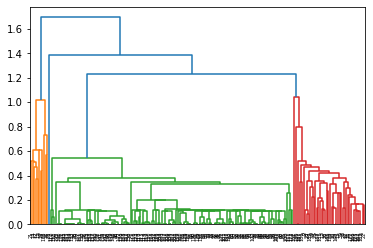

In [41]:
HAC_model(X, 3, 'euclidean', 'ward')

#### Choosing the Distance and Linkage 

From the documentation of Agglomerative Clustering I knew that if I used the *ward* linkage criteria I was restricted exclusively to the *Euclidean* distance so any combination of *ward* with other distances was not possible. Since I only have three features, I thought Manhattan was distance was unnecessary in this particular case. Additionally, experimentation with cosine distance only resulted in worse silhouette scores across all linkage criteria with the exception of the *ward* criteria. Therefore, I chose the *Euclidean* distance for my distance hyperparameter. From my knowledge of the *ward* linkage criteria I thought it would be the best linkage criteria for this data set because it takes into account all the points in the cluster much like *average* linkage criteria, but *ward* takes into account the sum of squared errors which is not done in the *average* linkage criteria. Furthermore, the data set is relatively small, so the computational expense of the *ward* linkage criteria is unwarranted in this case. By looking at the dendrogram I could see that the largest undisturbed line was a blue line to the farthest left of the graph, this was tough to see at first but upon zooming in I could see this was true. When I cut a horizontal line at this blue line, I saw that there was only three splits so I choose the amount of clusters to be 3, based on this visual method.



**D)** **Thouroughly discuss the performance** of your clustering model. 
    - which metric did you use to asses your model? (*IN A MARKDOWN CELL*)
    - how did your model perform? (*IN A MARKDOWN CELL*)
    - remake the 3 graphs from part a, but color by cluster assignment. Describe what characterizes each cluster, and give an example of a label for that cluster (e.g. "these donuts are low fat, and low sugar so I would call these healthy donuts") (*IN A MARKDOWN CELL*)

The metric I used to assess my models was the *Silhouette Score* because it is the standard for assessing most Clustering Models. Based on the *Silhouette Score* I chose my parameters for both of my clustering models. However, for the **Hierarchical Agglomerative model** I also used the dendrogram as a way to assess its performance and identify the optimum number of clusters to have.


The performance of both of my models was fairly good, with a Silhouette Scores in the 0.7's. The **Expectation Maximization** with K = 3 was the best model of the two with a Silhouette Score just slightly higher than that of the **Hierarchical Agglomerative** model, which was surprising. The **Hierarchical Agglomerative** model however gave me more information because along with the Silhouette Score, I could also view the dendrogram. From the dendrogram, I could see that the branches at the bottom were dense meaning my clusters had high cohesion, while the top branches were less dense meaning the clusters had high separation as well. The dendrogram appears to coincide with the Silhouette Score I received for the Hierarchical Agglomerative model.

#### Expectation Maximization Scatter Plots

In [17]:
# Look at scatter plots of clusters
Xe = X
# Create an Empty Model with K = 3 clusters
EM = GaussianMixture(n_components = 3)
# Fit the Model with X = x
EM.fit(Xe)
# Create cluster variable 
cluster = EM.predict(Xe)
# Create column for cluster variable to plot according to cluster
Xe["cluster"] = cluster

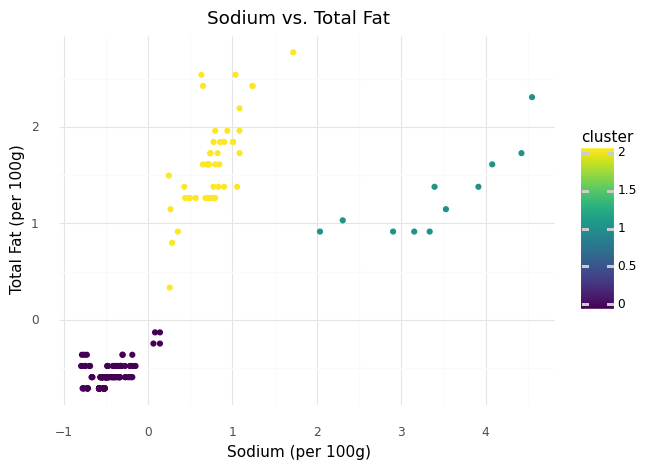

<ggplot: (155427309261)>

In [18]:
# Expectation Maximization
(ggplot(Xe, aes(x = 'Sodium_100g', y = 'Total_Fat_100g', color = 'cluster')) + geom_point() + theme_minimal()
 + ggtitle("Sodium vs. Total Fat")
 + labs(x = "Sodium (per 100g)", y = "Total Fat (per 100g)")
)

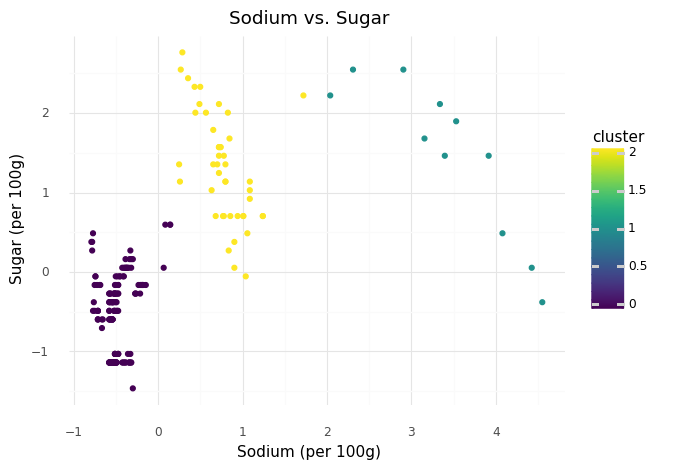

<ggplot: (155428621023)>

In [19]:
# Expectation Maximization
(ggplot(Xe, aes(x = 'Sodium_100g', y = 'Sugar_100g', color = 'cluster')) + geom_point() + theme_minimal()
 + ggtitle("Sodium vs. Sugar")
 + labs(x = "Sodium (per 100g)", y = "Sugar (per 100g)")
)

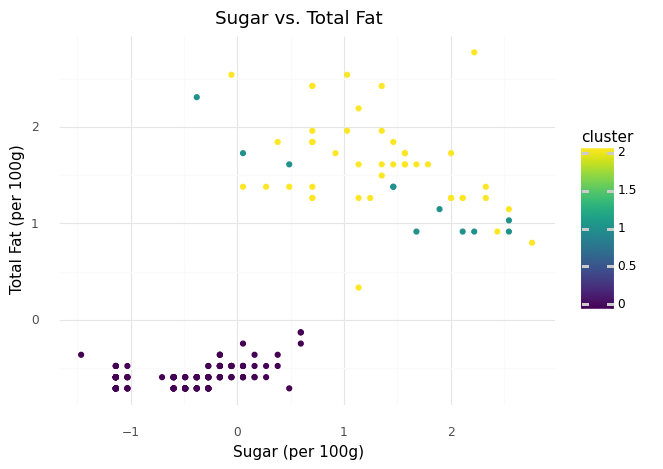

<ggplot: (155427622798)>

In [20]:
# Expectation Maximization
(ggplot(Xe, aes(x = 'Sugar_100g', y = 'Total_Fat_100g', color = 'cluster')) + geom_point() + theme_minimal()
 + ggtitle("Sugar vs. Total Fat")
 + labs(x = "Sugar (per 100g)", y = "Total Fat (per 100g)")
)

#### Hierarchical Agglomerative Clustering Scatter Plots

In [21]:
# Hierarchical Agglomerative 
Xh = X
# Create Empty Hierarchical model
HAC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# Fit Model 
HAC.fit(Xh)
# Create membership variable for Silhouette Score
membership = HAC.labels_
# Create column for cluster variable to plot according to cluster
Xe["cluster"] = membership

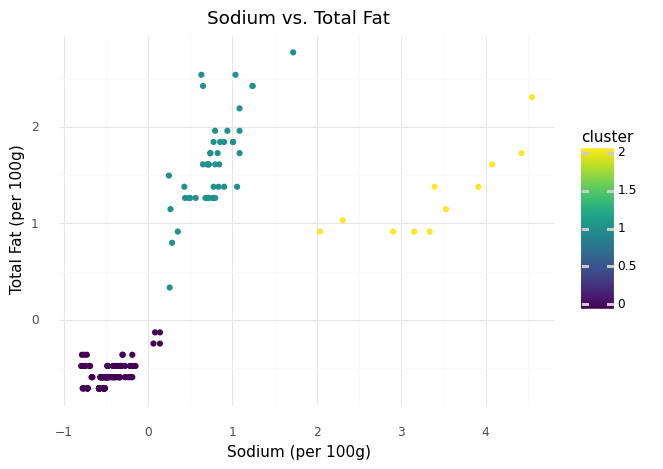

<ggplot: (155428536405)>

In [22]:
# Hierarchical Agglomerative 
(ggplot(Xh, aes(x = 'Sodium_100g', y = 'Total_Fat_100g', color = 'cluster')) + geom_point() + theme_minimal()
 + ggtitle("Sodium vs. Total Fat")
 + labs(x = "Sodium (per 100g)", y = "Total Fat (per 100g)")
)

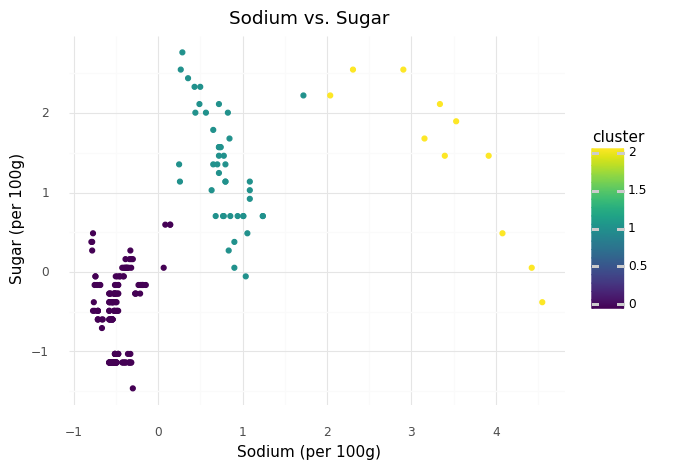

<ggplot: (155428622794)>

In [23]:
# Hierarchical Agglomerative 
(ggplot(Xh, aes(x = 'Sodium_100g', y = 'Sugar_100g', color = 'cluster')) + geom_point() + theme_minimal()
 + ggtitle("Sodium vs. Sugar")
 + labs(x = "Sodium (per 100g)", y = "Sugar (per 100g)")
)

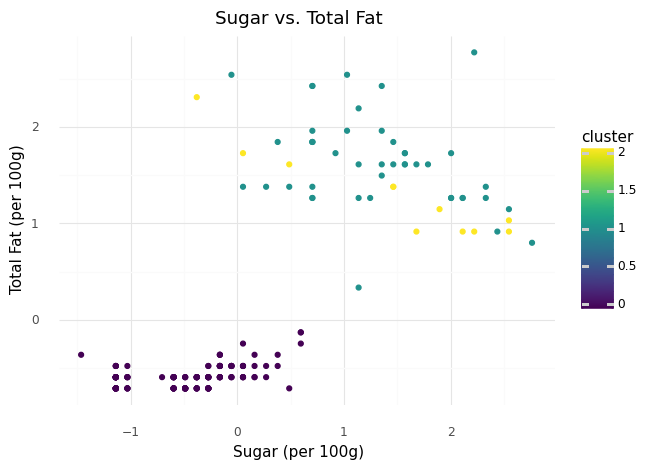

<ggplot: (155427529307)>

In [24]:
# Hierarchical Agglomerative 
(ggplot(Xh, aes(x = 'Sugar_100g', y = 'Total_Fat_100g', color = 'cluster')) + geom_point() + theme_minimal()
 + ggtitle("Sugar vs. Total Fat")
 + labs(x = "Sugar (per 100g)", y = "Total Fat (per 100g)")
)


**E)** Choose ONE other of the `_100g` variables from the data set to **add to your clustering model** to improve it.
    - explain why you chose this variable. (*IN A MARKDOWN CELL*)
    - make a new model, identical to the model in part c, but also including your new variable.
    - did this variable improve the fit of your clustering model? How can you tell? (*IN A MARKDOWN CELL*)
    
    
    
Note: The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

In [25]:
newfeatures = features + ['Cholesterol_100g']
newX = DF[newfeatures]

In [26]:
z = StandardScaler()
z.fit(newX)
newX[newfeatures] = z.transform(newX)

#### Reason for choosing *Cholesterol_100b*

The reason I chose *Cholesterol_100g* was because I thought it was highly correlated with all three of the features and would have high cohesion and separation as a result. 

In [29]:
EM_model(newX, 3)

0.7187069802509485

0.7187648340790112

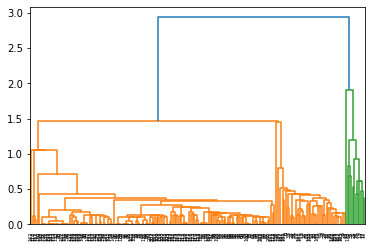

In [30]:
HAC_model(newX, 3)

#### Results of adding *Cholesterol_100g*

From the Silhouette Scores of both of my models I can see that adding *Cholesterol_100g* made the fit of my models slightly worse. Looking at the dendrogram of the **Hierarchical Agglomerative** with *Cholesterol_100g* model we see that there is still a densely populated bottom and a less dense top. In my opinion the top looks far less dense than the dendrogram of the **Hierarchical Agglomerative** without *Cholesterol_100g* model, however the Silhouette Score is worse than that of the **Hierarchical Agglomerative** without *Cholesterol_100g* model. The decrease in the Silhouette Score must be a result of the **Hierarchical Agglomerative** with *Cholesterol_100g* model being less dense at the bottom of the dendrogram when compared to the **Hierarchical Agglomerative** without *Cholesterol_100g* model because the Silhouette Score is based on both the separation of the clusters **AND** the cohesion of the clusters. Therefore, there must be lower cohesion proportional to separation in the **Hierarchical Agglomerative** without *Cholesterol_100g* model than the **Hierarchical Agglomerative** with *Cholesterol_100g* model.